# Recurrent Neural Network - LSTM
Added more features to the model than original project.

LSTM to predict Google stock prices using five features: open, high, low, close, and volume.




## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [ ]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
#training_set = dataset_train.iloc[:, 1:6].values

#### Convert Volume from string to float

In [ ]:
#df['DataFrame Column'] = df['DataFrame Column'].astype(int)
#y = x.astype(np.float)
dataset_train[['Close','Volume']] = dataset_train[['Close','Volume']].replace(',','', regex=True)
dataset_train[['Close','Volume']] = dataset_train[['Close','Volume']].apply(pd.to_numeric, errors  = 'coerce')

In [ ]:
dataset_train.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [ ]:
training_set = dataset_train.iloc[:, 1:6].values

In [ ]:
training_set = training_set.astype(np.float)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [ ]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0:5])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 5))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [ ]:
#df['DataFrame Column'] = df['DataFrame Column'].astype(int)
#y = x.astype(np.float)
dataset_test[['Close','Volume']] = dataset_test[['Close','Volume']].replace(',','', regex=True)
dataset_test[['Close','Volume']] = dataset_test[['Close','Volume']].apply(pd.to_numeric, errors  = 'coerce')

In [ ]:
real_stock_price = dataset_test.iloc[:, 1].values

### Getting the predicted stock price of 2017

In [ ]:
dataset_test.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
c = ['Open', 'High', 'Low', 'Close', 'Volume']
dataset_total = [dataset_train[c], dataset_test[c]]

In [ ]:
result = pd.concat(dataset_total, axis = 0, ignore_index=True)

In [ ]:
dataset_total = result

In [ ]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [ ]:
inputs = inputs.reshape(-1,5)

In [ ]:
inputs = sc.transform(inputs)

In [ ]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 5))

In [ ]:
predicted_stock_price = regressor.predict(X_test)

In [ ]:
predicted_stock_price = np.pad(predicted_stock_price,((0,0),(0,4)))

In [ ]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [ ]:
'''
#dataset_total = pd.concat((dataset_train[:,1:5], dataset_test[:,1:5]), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,5)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0:5])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 5))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = predicted_stock_price.reshape(-1,5)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
'''

'\n#dataset_total = pd.concat((dataset_train[:,1:5], dataset_test[:,1:5]), axis = 0)\ninputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values\ninputs = inputs.reshape(-1,5)\ninputs = sc.transform(inputs)\nX_test = []\nfor i in range(60, 80):\n    X_test.append(inputs[i-60:i, 0:5])\nX_test = np.array(X_test)\nX_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 5))\npredicted_stock_price = regressor.predict(X_test)\npredicted_stock_price = predicted_stock_price.reshape(-1,5)\npredicted_stock_price = sc.inverse_transform(predicted_stock_price)\n'

In [ ]:
pred_stock_price = pd.DataFrame(predicted_stock_price)
pred = np.array(pred_stock_price[0])

## Visualising the results

The predicted graph is much smoother than when the model was only using the open price data.

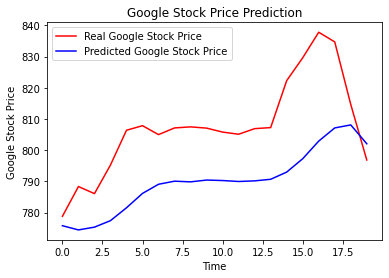

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

#Predicting the price of the stock is one thing, how does it do predicting the change in the stock?  

When should you buy or sell based on change of the price?

In [ ]:
pred_delta = []
pred_delta.append(0)

read_delta = [0]
for i in np.arange(1,len(pred)):
  pred_delta.append((pred[i]-pred[i-1])/pred[i-1])
print(pred_delta)

[0, -0.0017368002, 0.0011485851, 0.002683727, 0.0053128125, 0.0058839554, 0.0037290177, 0.0012552242, -0.00027486376, 0.0007279942, -0.00019026354, -0.00038677806, 0.00024963327, 0.0006431995, 0.0029132634, 0.00540567, 0.0070859245, 0.005257362, 0.0011939441, -0.0074736257]


In [ ]:
real = real_stock_price
real_delta = []
real_delta.append(0)


for i in np.arange(1,len(real)):
  real_delta.append((real[i]-real[i-1])/real[i-1])
print(real_delta)

[0, 0.012262297607889047, -0.002892079760515466, 0.011678200692041459, 0.014007997384503165, 0.0018105158730159182, -0.0035402173643948377, 0.002658385093167685, 0.00042124042916970024, -0.0004953683063357324, -0.0015735738712396483, -0.000856281257368289, 0.0022232710651827847, 0.00042136049869258264, 0.018643542892536332, 0.008901860634804876, 0.009871989585593334, -0.003700122939568529, -0.0240203184339472, -0.021849605970588902]


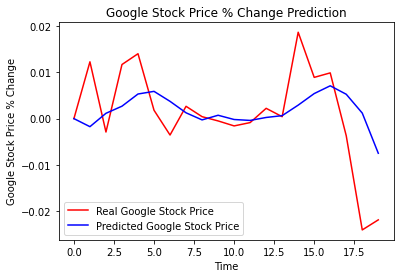

In [ ]:
plt.plot(real_delta, color = 'red', label = 'Real Google Stock Price')
plt.plot(pred_delta, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price % Change Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price % Change')
plt.legend()
plt.show()

The model does well reacting but not over-fitting on the day-to-day change of the stock price.